In [5]:
from ast import literal_eval
import pandas as pd
import numpy as np
import lucem_illud_2020

import scipy
import sklearn_extra
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics
import sklearn.mixture

import gensim
import networkx as nx
from gensim.models import ldaseqmodel
from gensim.matutils import kullback_leibler

import matplotlib.pyplot as plt
import matplotlib.cm
import seaborn as sns

import util_fns
import cluster_fns

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
tal_df = util_fns.load_and_clean('total_trans_normalized.csv', False)

In [9]:
ep_df = util_fns.load_and_clean('total_trans_normalized.csv')

## Prologue Clustering

### Flat Clustering

In [10]:
pro_df = tal_df[tal_df['act_name'] == 'Prologue']

In [11]:
pro_df.head()

,ep_num,ep_title,year,url,act_name,text,tokenized_sents,no_lemma_normalized_sents,normalized_sents,tokenized_text,normalized_tokens,no_lemma_normalized_tokens
4,1,New Beginnings,1995,https://www.thisamericanlife.org/1/transcript,Prologue,"Joe Franklin?I'm ready.It's Ira Glass here.Oh,...","[[Joe, Franklin?I'm, ready], [It, 's, Ira, Gla...","[[joe, franklin?i'm, ready], [ira, glass], [oh...","[[joe, franklin?i'm, ready], [ira, glass], [oh...","[Joe, Franklin?I'm, ready, It, 's, Ira, Glass,...","[joe, franklin?i'm, ready, ira, glass, oh, emc...","[joe, franklin?i'm, ready, ira, glass, oh, emc..."
6,2,Small Scale Sin,1995,https://www.thisamericanlife.org/2/transcript,Prologue,"OK, three boys, aged 13, 15, and 16. All three...","[[OK, three, boys, aged, 13, 15, and, 16], [Al...","[[ok, boys, aged], [chose, appear, fake, names...","[[okay, boy, age], [choose, appear, fake, name...","[OK, three, boys, aged, 13, 15, and, 16, All, ...","[okay, boy, age, choose, appear, fake, name, r...","[ok, boys, aged, chose, appear, fake, names, r..."
19,5,Anger and Forgiveness,1995,https://www.thisamericanlife.org/5/transcript,Prologue,Hi. It's Ira Glass recording this in 2006. An...,"[[Hi], [It, 's, Ira, Glass, recording, this, i...","[[hi], [ira, glass, recording], [listen, fifth...","[[hello], [ira, glass, record], [listen, 5, ep...","[Hi, It, 's, Ira, Glass, recording, this, in, ...","[hello, ira, glass, record, listen, 5, episode...","[hi, ira, glass, recording, listen, fifth, epi..."
28,6,Christmas,1995,https://www.thisamericanlife.org/6/transcript,Prologue,"From the WBEZ Chicago, it's Your Radio Playho...","[[From, the, WBEZ, Chicago, it, 's, Your, Radi...","[[wbez, chicago, radio, playhouse], [hi], [rev...","[[wbez, chicago, radio, playhouse], [hello], [...","[From, the, WBEZ, Chicago, it, 's, Your, Radio...","[wbez, chicago, radio, playhouse, hello, rever...","[wbez, chicago, radio, playhouse, hi, reverend..."
32,7,Quitting,1995,https://www.thisamericanlife.org/7/transcript,Prologue,"What will make you change? For most of us, it ...","[[What, will, make, you, change], [For, most, ...","[[change], [self, help, books, courses, learni...","[[change], [self, help, book, course, learn, a...","[What, will, make, you, change, For, most, of,...","[change, self, help, book, course, learn, anne...","[change, self, help, books, courses, learning,..."


In [12]:
CountVectorizer = sklearn.feature_extraction.text.CountVectorizer()
pro_vects = CountVectorizer.fit_transform(pro_df['text'])
print(pro_vects.shape)

(627, 20775)


In [13]:
# tf-idf
proTFTransformer = sklearn.feature_extraction.text. \
                           TfidfTransformer().fit(pro_vects)
#train
proTF = proTFTransformer.transform(pro_vects)
print(proTF.shape)

(627, 20775)


In [15]:
# examine the words with the highest TF IDF score
x = pd.DataFrame(list(zip(CountVectorizer.vocabulary_.keys(), proTF.data)))
x.columns=['word','TFIDF score']
x = x.sort_values('TFIDF score', ascending=False)
x.iloc[:20]

,word,TFIDF score
20262,nonwhite,0.809570
20745,feedback,0.567849
2813,splendor,0.543890
6805,suffered,0.538531
17070,custody,0.515066
8316,primaries,0.481242
17699,blasted,0.472924
10083,herding,0.463036
1543,crisscrossing,0.456382
5215,pillow,0.447737


In [51]:
proTFVectorizer, proTFVects = cluster_fns.make_vec_vectorizer(pro_df)

#### Gaussian

In [89]:
gauss_clf = cluster_fns.make_train(3, proTFVects.todense(), 'gauss')
labels = gauss_clf.predict(proTFVects.todense())

Top terms per cluster:
Cluster 0:
government
money
state
president
country
republican
speaking
law
political
new


Cluster 1:
school
kids
love
mom
year
oh
ok
dad
good
thought


Cluster 2:
guy
car
world
war
new
police
job
ok
let
doing




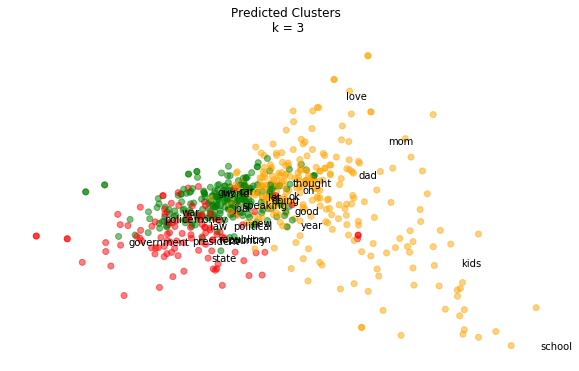

In [90]:
cluster_fns.pca_and_plot(proTFVects, proTFVectorizer, gauss_clf, 'gauss', 3, labels)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


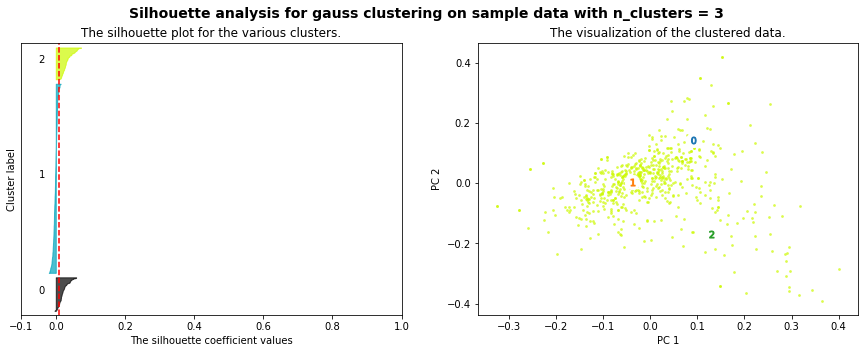

For n_clusters = 3, The average silhouette_score is : 0.009


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


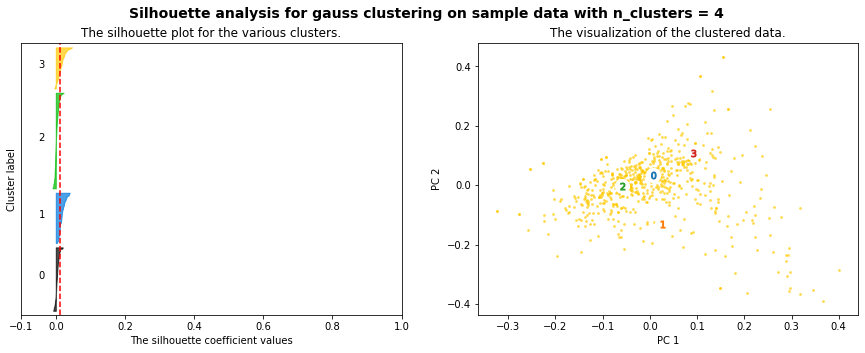

For n_clusters = 4, The average silhouette_score is : 0.013


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


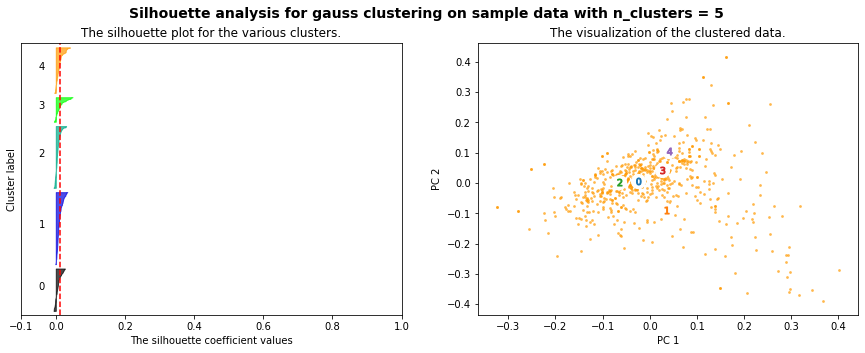

For n_clusters = 5, The average silhouette_score is : 0.014


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


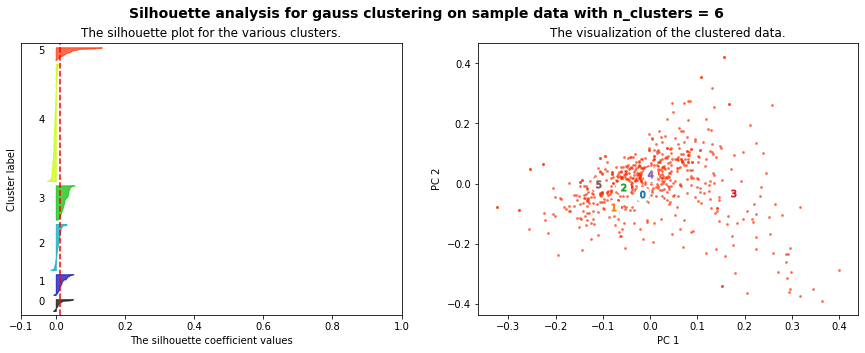

For n_clusters = 6, The average silhouette_score is : 0.011


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


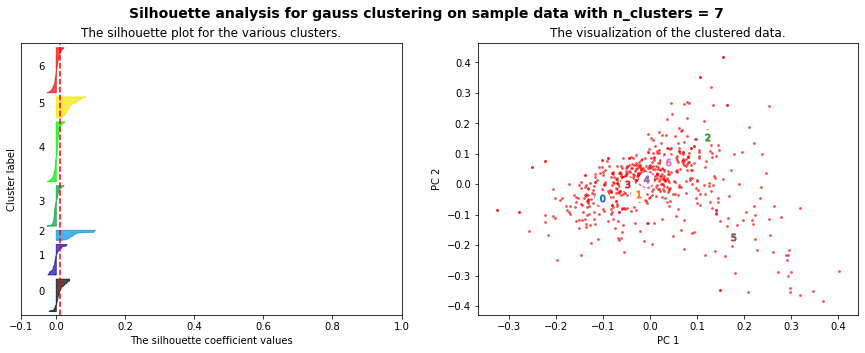

For n_clusters = 7, The average silhouette_score is : 0.013


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


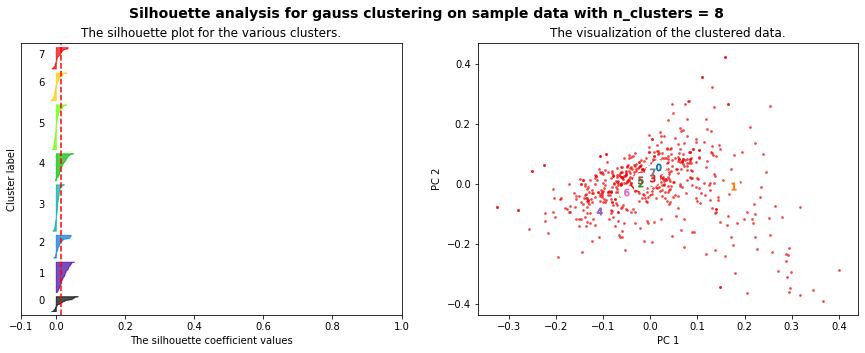

For n_clusters = 8, The average silhouette_score is : 0.015


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


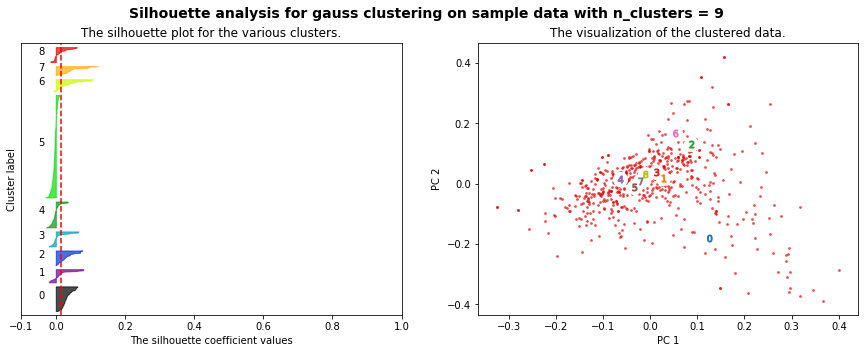

For n_clusters = 9, The average silhouette_score is : 0.014


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


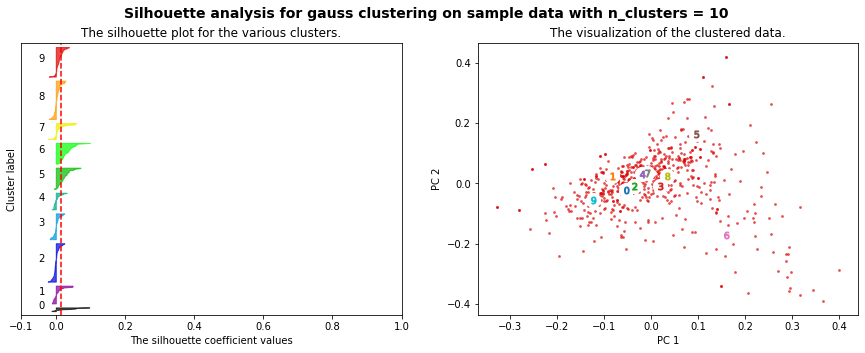

For n_clusters = 10, The average silhouette_score is : 0.014


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


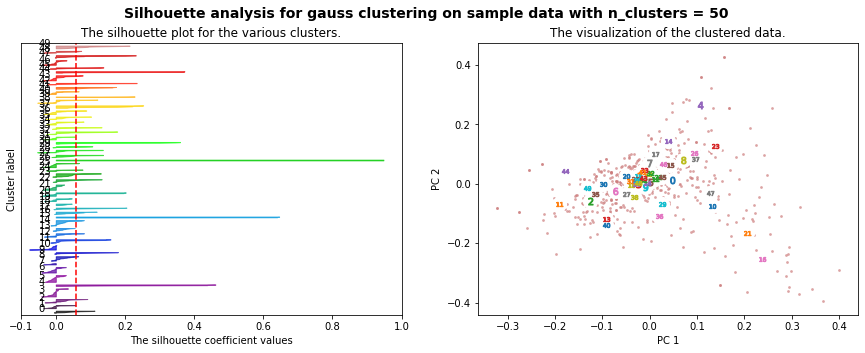

For n_clusters = 50, The average silhouette_score is : 0.058


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


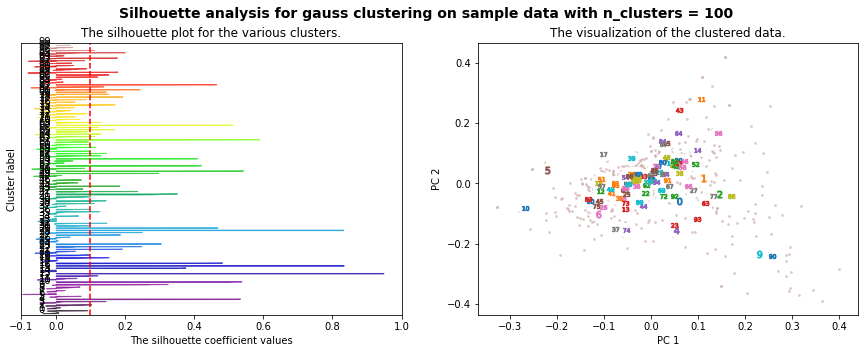

For n_clusters = 100, The average silhouette_score is : 0.099


In [92]:
range_lst = list(range(3, 11)) + [50, 100] 
for i in range_lst:
    X = proTFVects.toarray()
    cluster_fns.plotSilhouette(i, X, 'gauss', proTFVects)

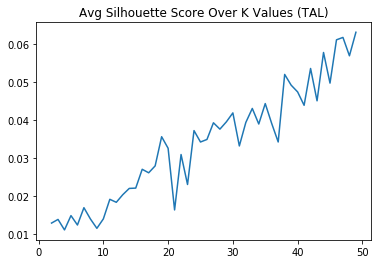

In [93]:
cluster_fns.plot_avg_sil(proTFVects, 'gauss')

This looks like it steep declines at 20 and at 9, should we focus on like 19 or 8 clusters?


#### K-Means

Top terms per cluster:
Cluster 0:
guy
ok
new
money
world
good
man
doing
love
person


Cluster 1:
mom
dad
christmas
father
family
mother
parents
love
cat
baby


Cluster 2:
school
kids
high
schools
students
class
kid
girls
friends
year




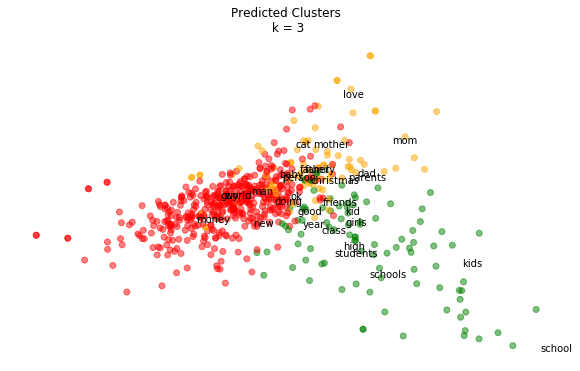

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


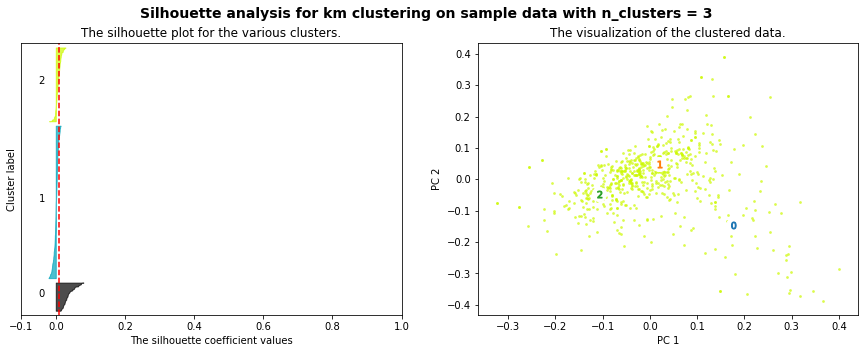

For n_clusters = 3, The average silhouette_score is : 0.010


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


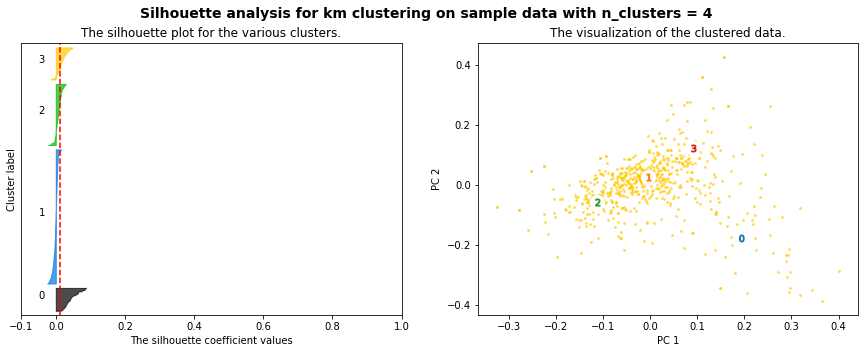

For n_clusters = 4, The average silhouette_score is : 0.013


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


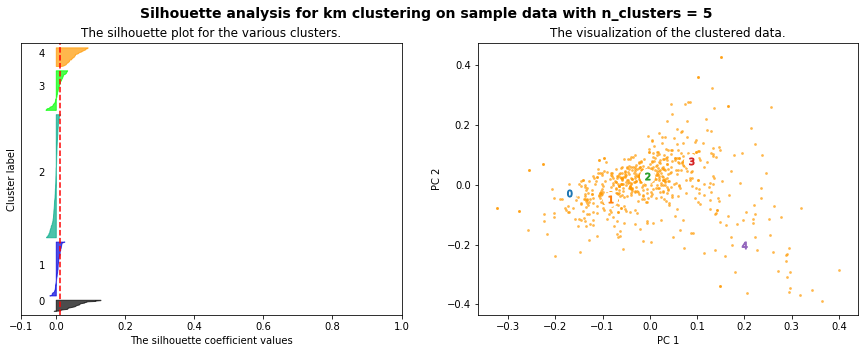

For n_clusters = 5, The average silhouette_score is : 0.013


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


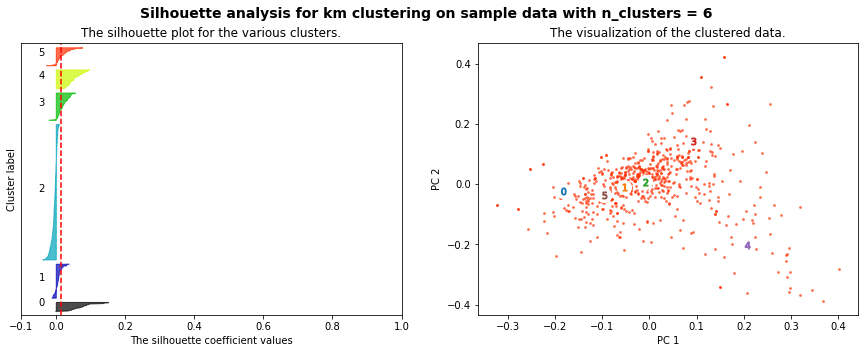

For n_clusters = 6, The average silhouette_score is : 0.014


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


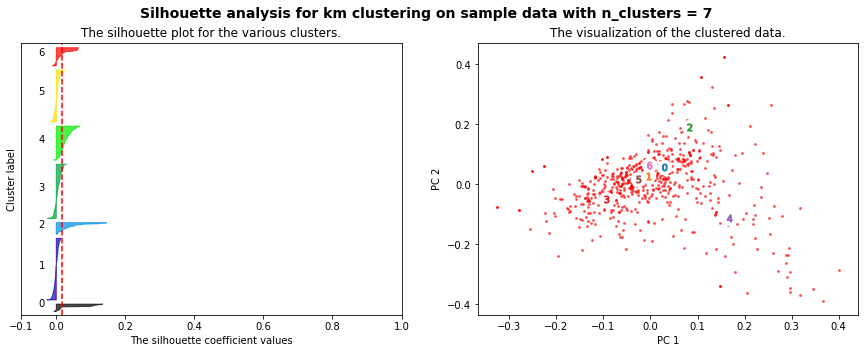

For n_clusters = 7, The average silhouette_score is : 0.017


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


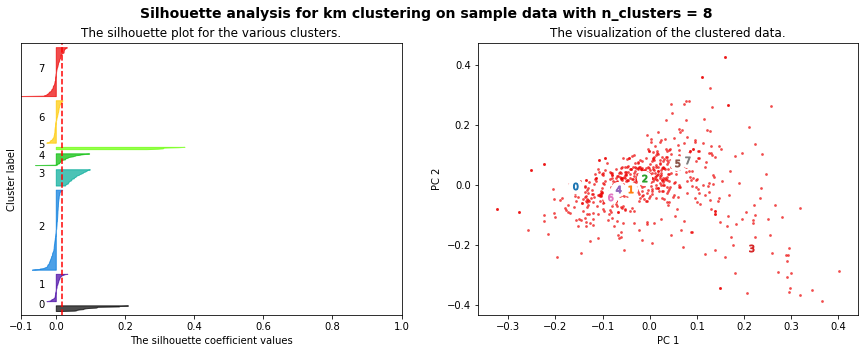

For n_clusters = 8, The average silhouette_score is : 0.019


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


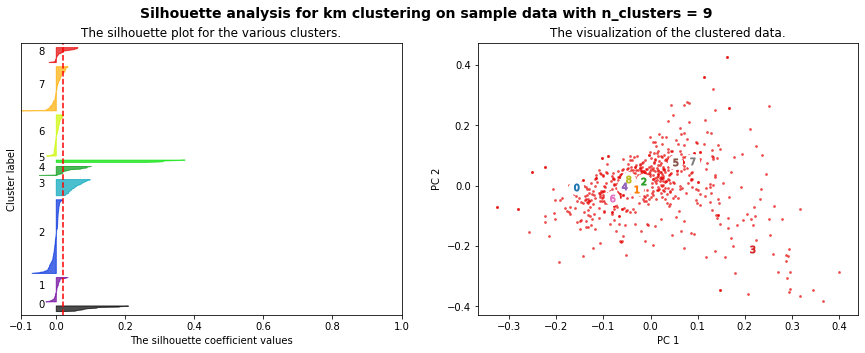

For n_clusters = 9, The average silhouette_score is : 0.021


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


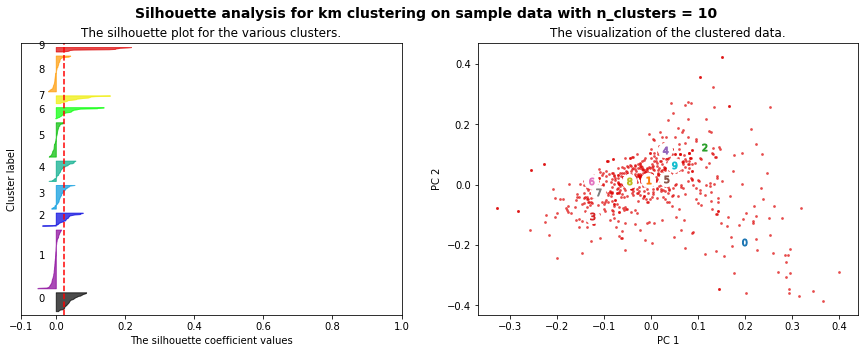

For n_clusters = 10, The average silhouette_score is : 0.023


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


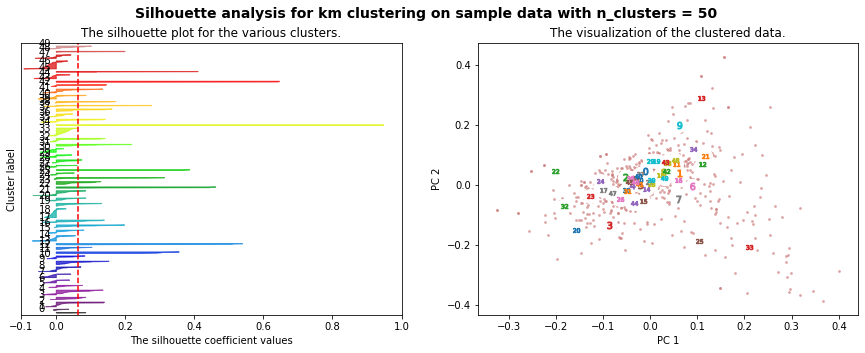

For n_clusters = 50, The average silhouette_score is : 0.064


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


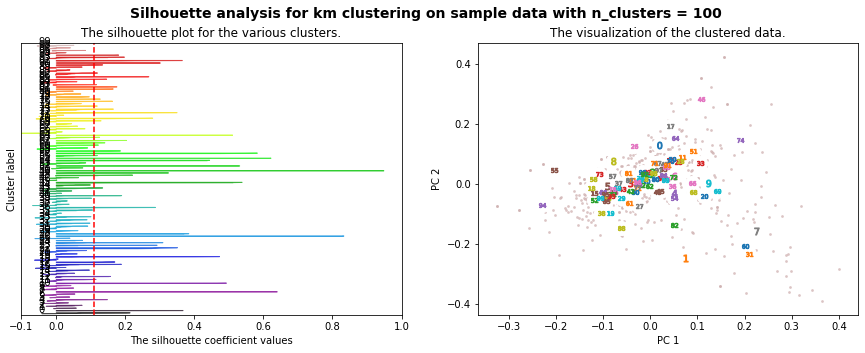

For n_clusters = 100, The average silhouette_score is : 0.110


In [94]:
km_clf = cluster_fns.make_train(3, proTFVects, 'km')
labels = km_clf.labels_
cluster_fns.pca_and_plot(proTFVects, proTFVectorizer, km_clf, 'km', 3, labels)
range_lst = list(range(3, 11)) + [50, 100] 
for i in range_lst:
    X = proTFVects.toarray()
    cluster_fns.plotSilhouette(i, X, 'km', proTFVects)

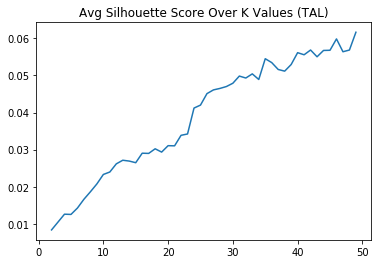

In [95]:
cluster_fns.plot_avg_sil(proTFVects, 'km')

#### DBSCAN

In [96]:
dbscan_clf = cluster_fns.make_train(3, proTFVects, 'dbscan')
labels = dbscan_clf.labels_

['100', 'arm', 'boys', 'dangerous', 'end', 'happens', 'makes']


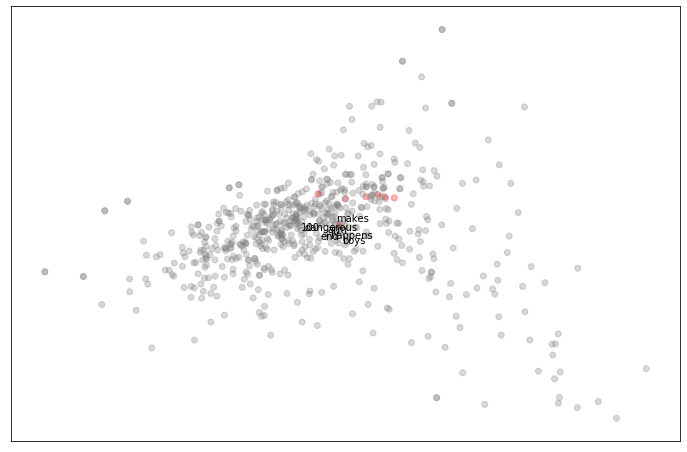

In [145]:
cluster_fns.plot_dbscan(proTFVects, proTFVectorizer, labels)

In [106]:
sklearn.metrics.silhouette_score(proTFVects.toarray(), labels, metric='cosine')

0.03196774949930009

### Hierarchical

In [156]:
pro_cooc_mat, pro_linkage_mat = cluster_fns.make_coor_mat(proTFVects)

hier
{'get_leaves': True, 'p': 4, 'truncate_mode': 'level'}


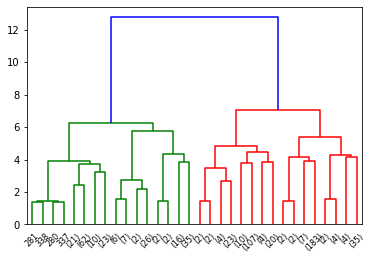

In [177]:
cluster_fns.make_dendos(pro_cooc_mat, pro_linkage_mat, 'hier')

In [179]:
cluster_fns.make_dendos(pro_cooc_mat, pro_linkage_mat, 'flat')

flat
{'criterion': 'maxclust', 't': 2}
0.09753166625879549
flat
{'criterion': 'maxclust', 't': 4}
0.04458671798886995
flat
{'criterion': 'maxclust', 't': 6}
0.03790307549757094
flat
{'criterion': 'distance', 't': 2}
0.048382316383108845
flat
{'criterion': 'distance', 't': 4}
0.04123805795208006
flat
{'criterion': 'distance', 't': 6}
0.04458671798886995


## Episode Clustering

### Flat Clustering

In [180]:
CountVectorizer = sklearn.feature_extraction.text.CountVectorizer()
ep_vects = CountVectorizer.fit_transform(tal_df['text'])
print(ep_vects.shape)

(3055, 59016)


In [182]:
# tf-idf
epTFTransformer = sklearn.feature_extraction.text. \
                           TfidfTransformer().fit(ep_vects)
#train
epTF = epTFTransformer.transform(ep_vects)
print(epTF.shape)

(3055, 59016)


In [183]:
# examine the words with the highest TF IDF score
x = pd.DataFrame(list(zip(CountVectorizer.vocabulary_.keys(), epTF.data)))
x.columns=['word','TFIDF score']
x = x.sort_values('TFIDF score', ascending=False)
x.iloc[:20]

,word,TFIDF score
49001,mushasha,0.751363
45946,jackroller,0.694358
721,why,0.667579
47718,irretrievable,0.630343
6461,leona,0.601069
6190,nest,0.585476
7528,bisexual,0.570059
37298,undetermined,0.566751
58144,kwok,0.562274
41150,darnedest,0.536751


In [184]:
epTFVectorizer, epTFVects = cluster_fns.make_vec_vectorizer(ep_df)

#### Gaussian

In [185]:
gauss_clf = cluster_fns.make_train(3, epTFVects.todense(), 'gauss')
labels = gauss_clf.predict(epTFVects.todense())

Top terms per cluster:
Cluster 0:
larry
brian
police
tony
donald
cat
hospital
dying
dole
susan


Cluster 1:
government
republican
president
spanish
iraq
trump
police
immigration
vote
court


Cluster 2:
church
david
song
girls
sex
police
john
singing
laughter
hospital




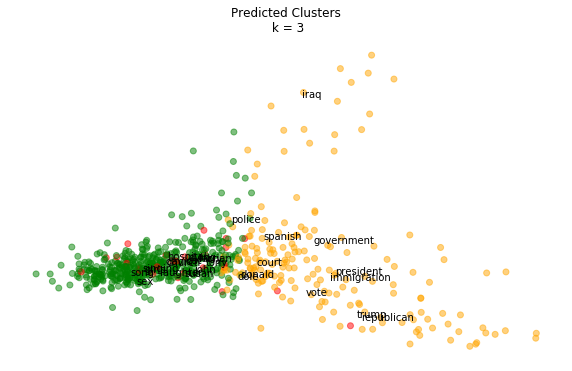

In [187]:
cluster_fns.pca_and_plot(epTFVects, epTFVectorizer, gauss_clf, 'gauss', 3, labels)

So I'm surprised that 3 clusters broken down like this? But I guess it would have to do w/ the flattening to a 2D representation?

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


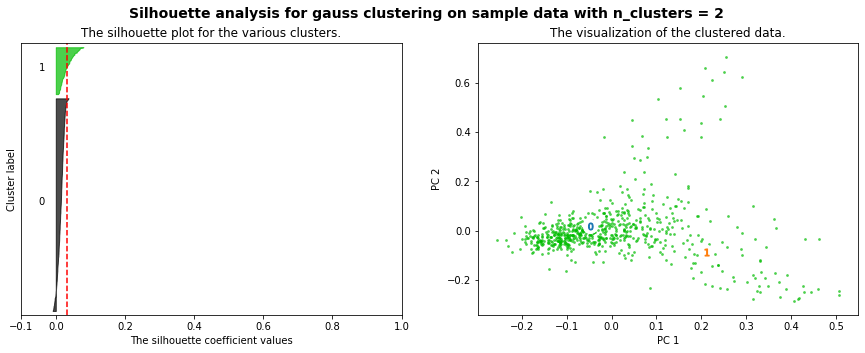

For n_clusters = 2, The average silhouette_score is : 0.032


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


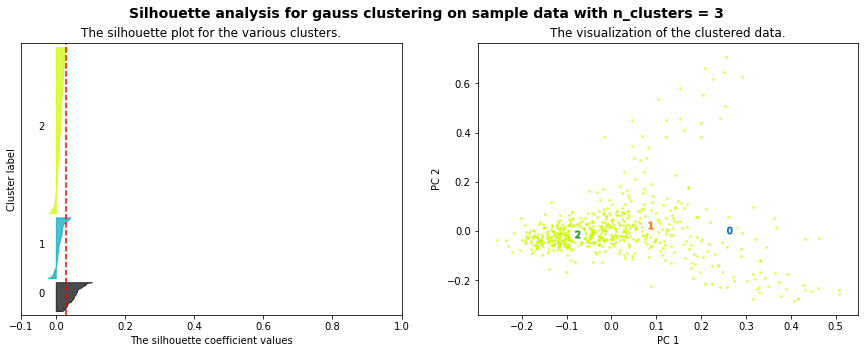

For n_clusters = 3, The average silhouette_score is : 0.029


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


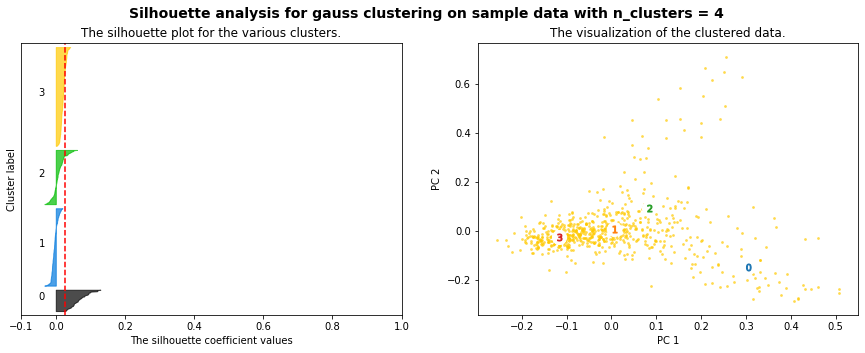

For n_clusters = 4, The average silhouette_score is : 0.026


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


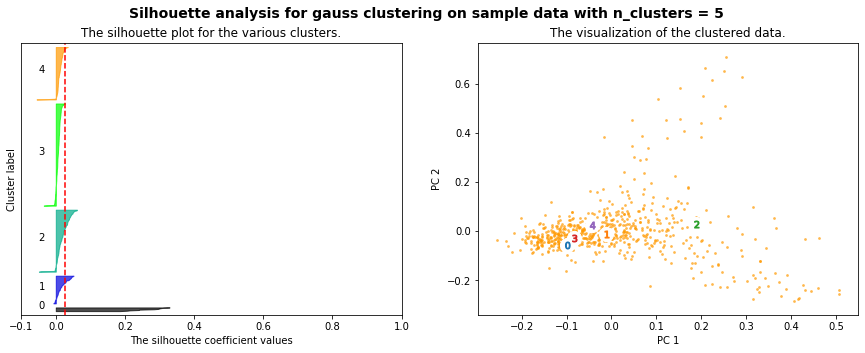

For n_clusters = 5, The average silhouette_score is : 0.027


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


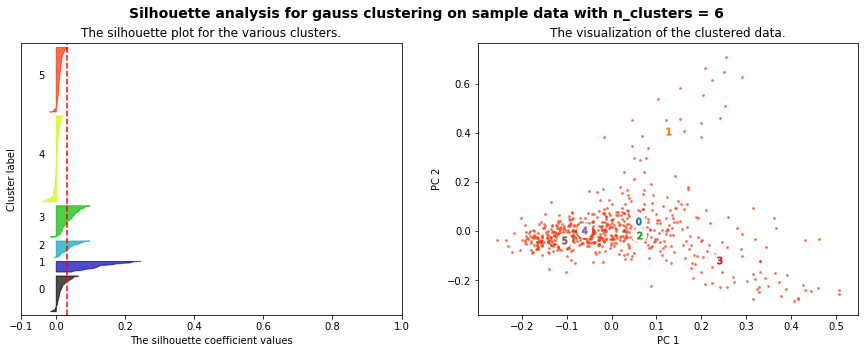

For n_clusters = 6, The average silhouette_score is : 0.033


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


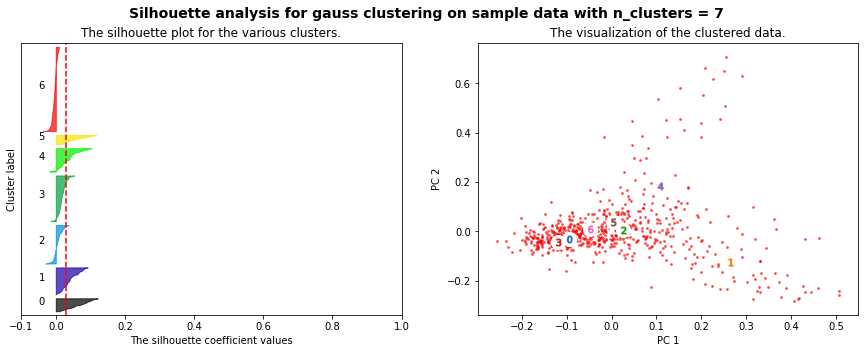

For n_clusters = 7, The average silhouette_score is : 0.029


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


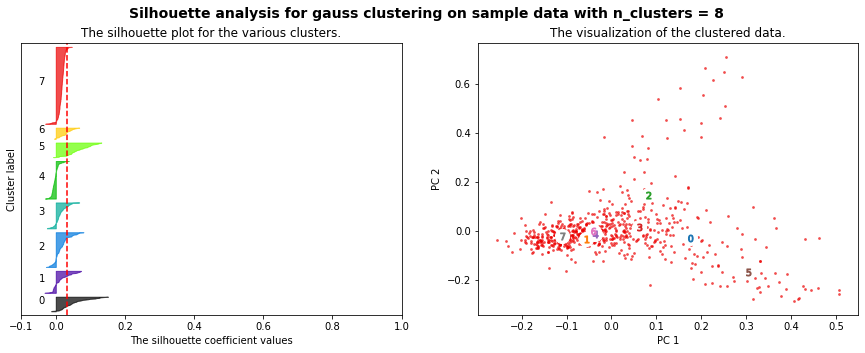

For n_clusters = 8, The average silhouette_score is : 0.033


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


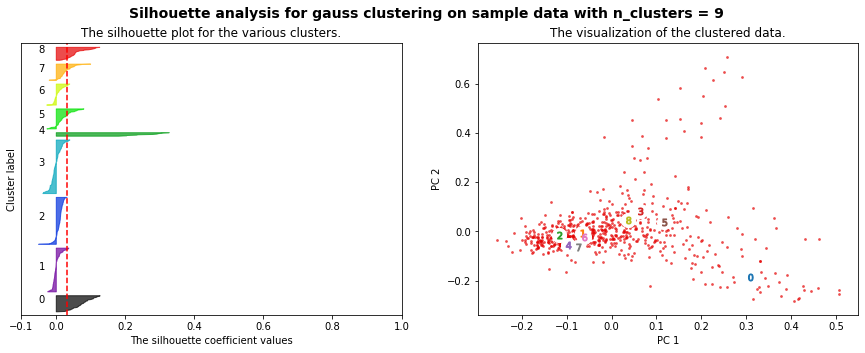

For n_clusters = 9, The average silhouette_score is : 0.032


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


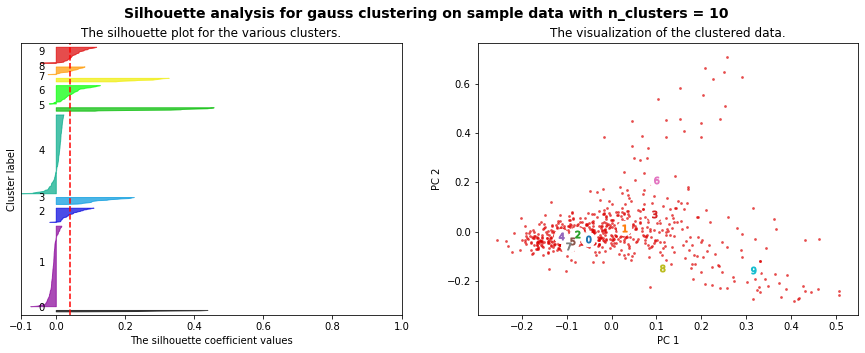

For n_clusters = 10, The average silhouette_score is : 0.042


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


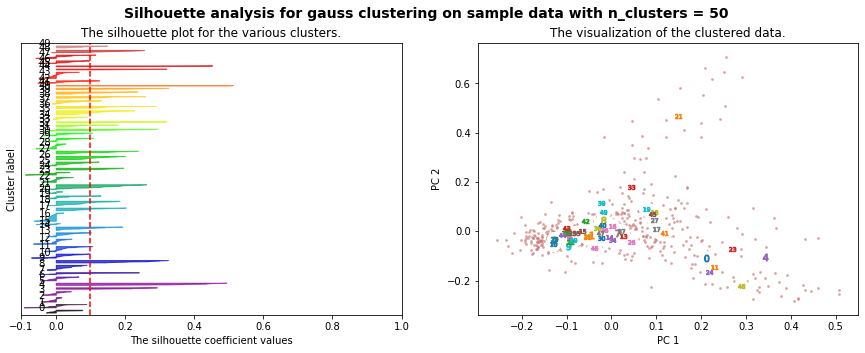

For n_clusters = 50, The average silhouette_score is : 0.098


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


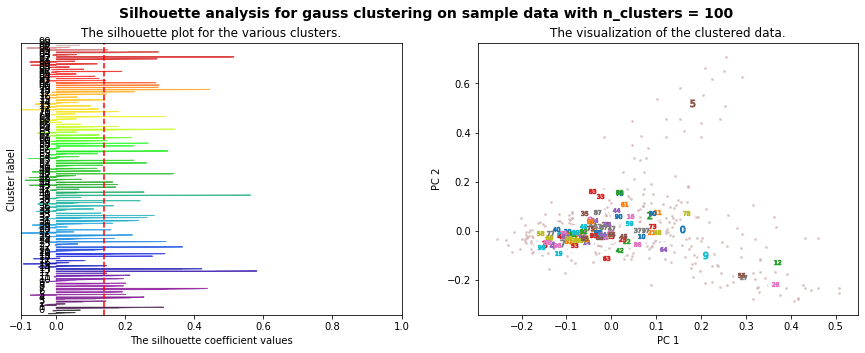

For n_clusters = 100, The average silhouette_score is : 0.139


In [194]:
range_lst = list(range(2, 11)) + [50, 100] 
for i in range_lst:
    X = epTFVects.toarray()
    cluster_fns.plotSilhouette(i, X, 'gauss', epTFVects)

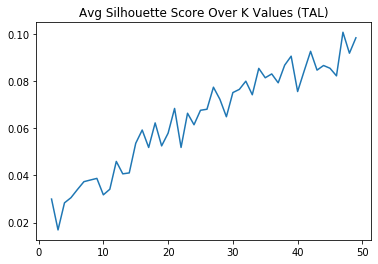

In [189]:
cluster_fns.plot_avg_sil(epTFVects, 'gauss')

#### K Means

Top terms per cluster:
Cluster 0:
government
president
police
iraq
republican
spanish
trump
court
immigration
vote


Cluster 1:
david
church
song
sex
girls
laughter
john
singing
married
christmas




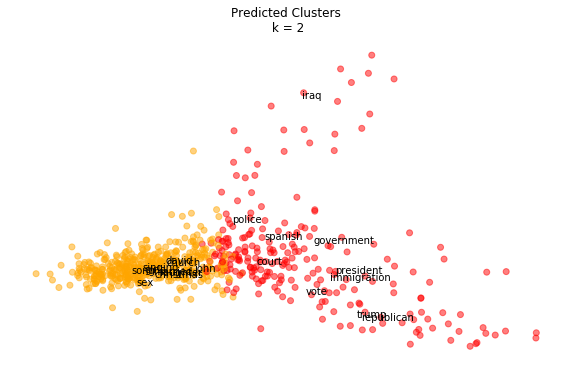

In [195]:
clust_num = 2
km_clf = cluster_fns.make_train(clust_num, epTFVects, 'km')
labels = km_clf.labels_
cluster_fns.pca_and_plot(epTFVects, epTFVectorizer, km_clf, 'km', clust_num, labels)

Top terms per cluster:
Cluster 0:
police
government
iraq
spanish
chicken
students
fbi
company
court
arabic


Cluster 1:
david
song
sex
church
girls
hospital
married
singing
john
christmas


Cluster 2:
republican
trump
democrats
vote
president
republicans
immigration
obama
campaign
election




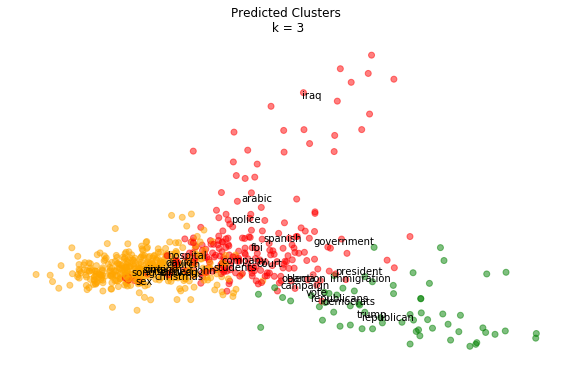

In [196]:
clust_num = 3
km_clf = cluster_fns.make_train(clust_num, epTFVects, 'km')
labels = km_clf.labels_
cluster_fns.pca_and_plot(epTFVects, epTFVectorizer, km_clf, 'km', clust_num, labels)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


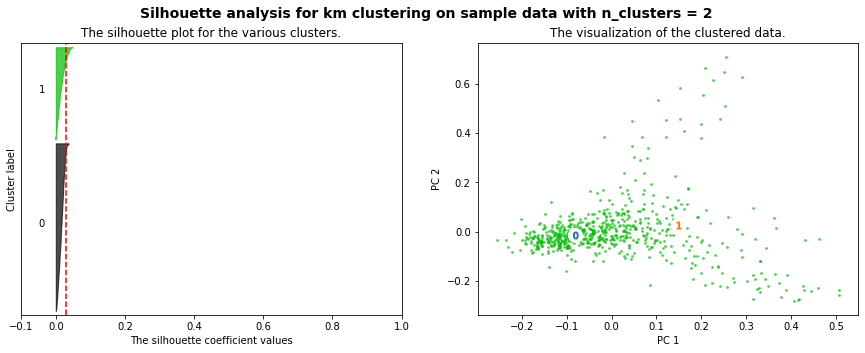

For n_clusters = 2, The average silhouette_score is : 0.030


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


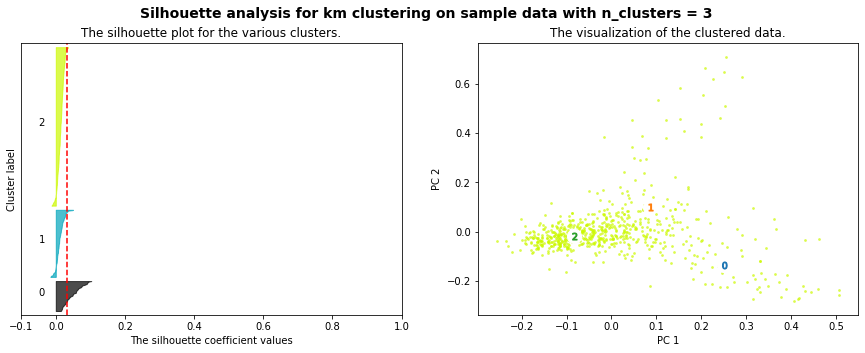

For n_clusters = 3, The average silhouette_score is : 0.031


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


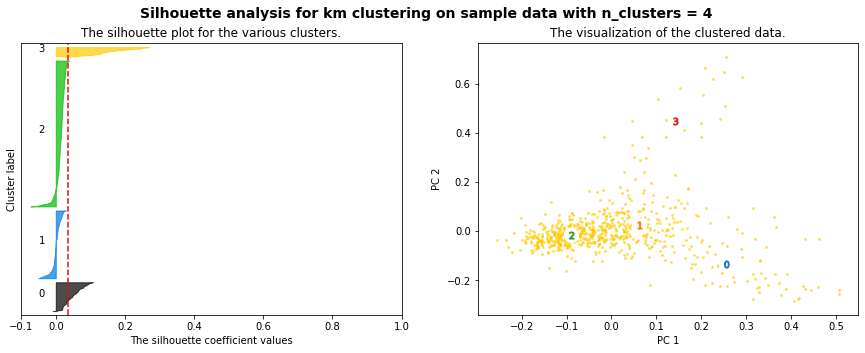

For n_clusters = 4, The average silhouette_score is : 0.035


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


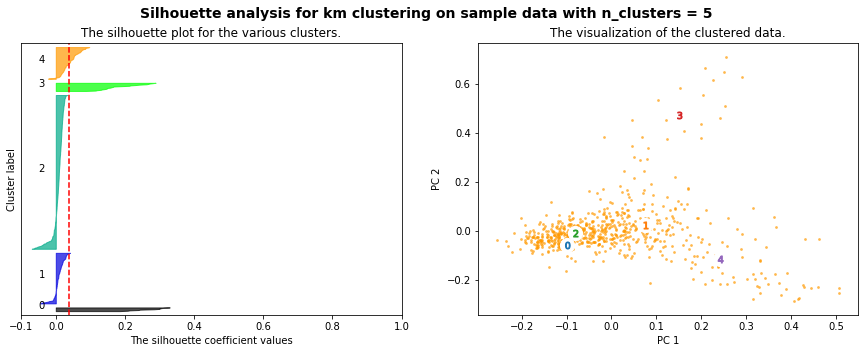

For n_clusters = 5, The average silhouette_score is : 0.039


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


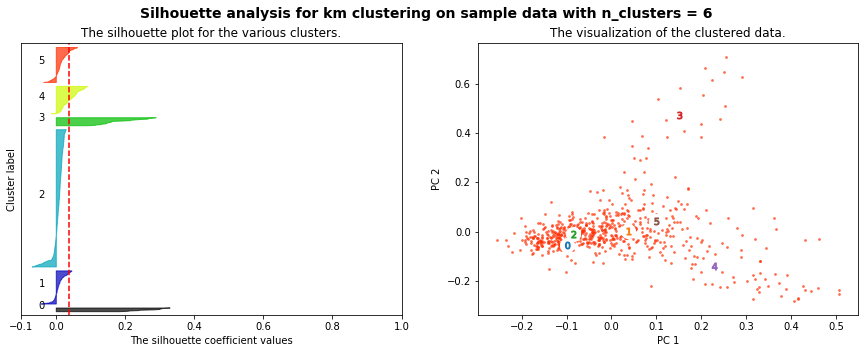

For n_clusters = 6, The average silhouette_score is : 0.039


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


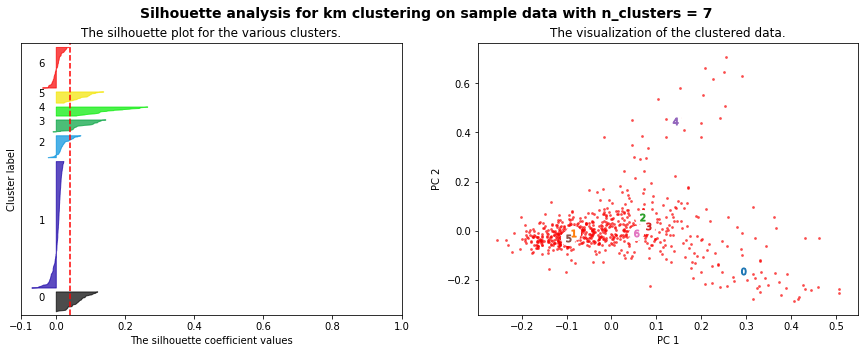

For n_clusters = 7, The average silhouette_score is : 0.040


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


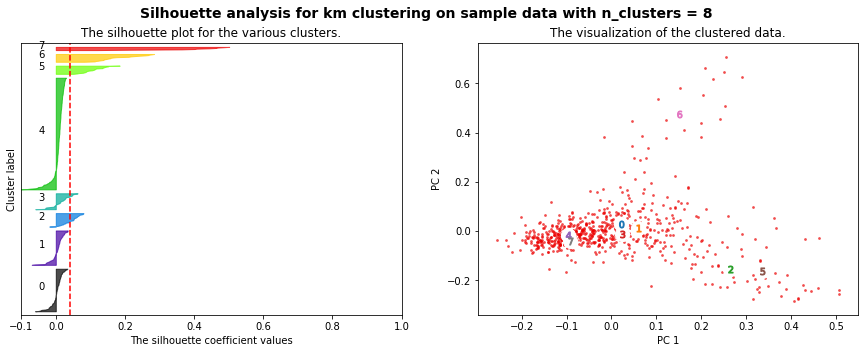

For n_clusters = 8, The average silhouette_score is : 0.040


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


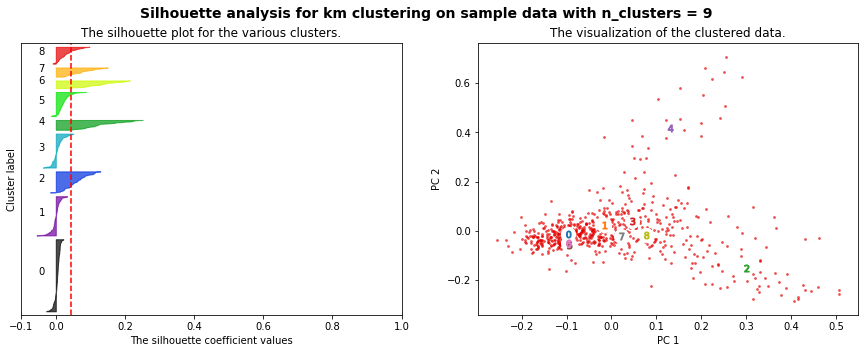

For n_clusters = 9, The average silhouette_score is : 0.043


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


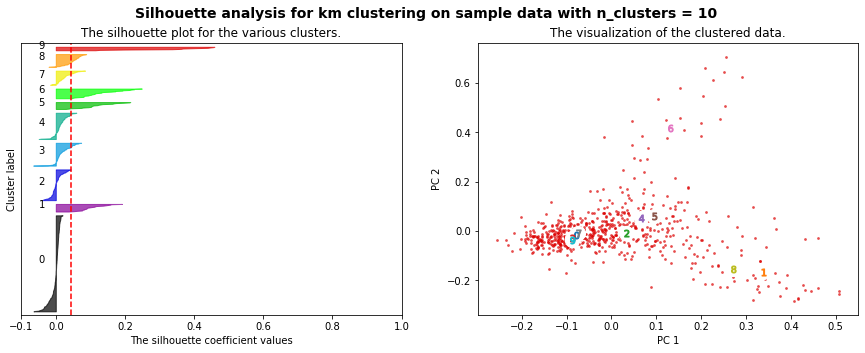

For n_clusters = 10, The average silhouette_score is : 0.043


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


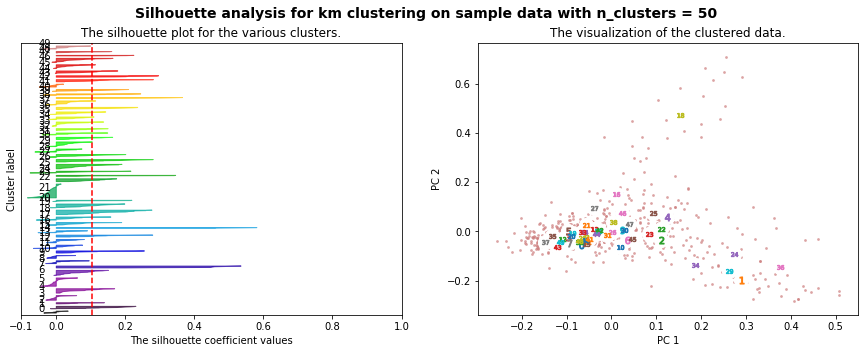

For n_clusters = 50, The average silhouette_score is : 0.105


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


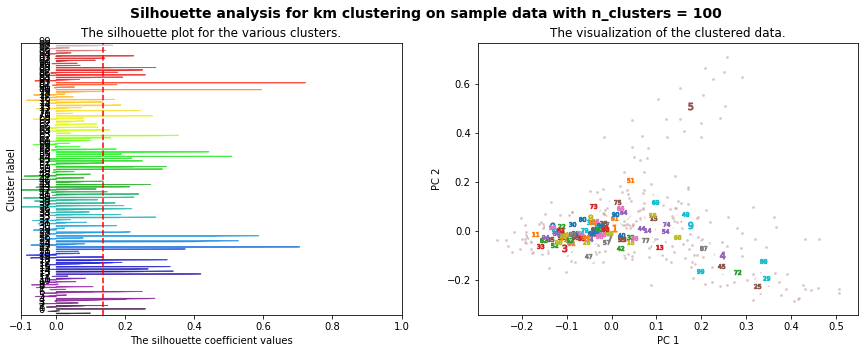

For n_clusters = 100, The average silhouette_score is : 0.137


In [192]:
range_lst = list(range(2, 11)) + [50, 100] 
for i in range_lst:
    X = epTFVects.toarray()
    cluster_fns.plotSilhouette(i, X, 'km', epTFVects)

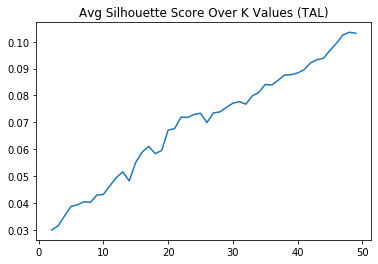

In [197]:
cluster_fns.plot_avg_sil(epTFVects, 'km')

#### DBSCAN

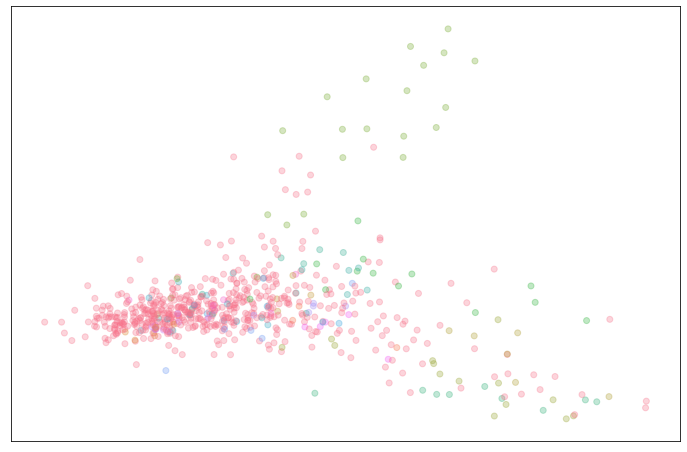

In [216]:
dbscan_clf = cluster_fns.make_train(3, epTFVects, 'dbscan')
labels = dbscan_clf.labels_
cluster_fns.plot_dbscan(epTFVects, epTFVectorizer, labels)

In [217]:
sklearn.metrics.silhouette_score(epTFVects.toarray(), labels, metric='cosine')

0.013263151123755328

DSCAN says 17 clusters best but also score isn't super high

### Hierarchical

In [218]:
pro_cooc_mat, pro_linkage_mat = cluster_fns.make_coor_mat(proTFVects)

/Users/katykoeing/miniconda3/lib/python3.7/site-packages/scipy/cluster/hierarchy.py:878: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


hier
{'get_leaves': True, 'p': 4, 'truncate_mode': 'level'}


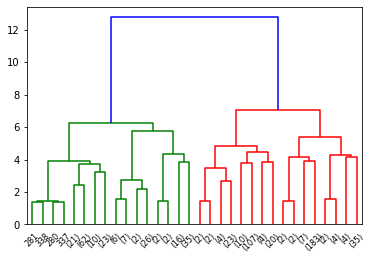

In [219]:
cluster_fns.make_dendos(pro_cooc_mat, pro_linkage_mat, 'hier')

In [220]:
cluster_fns.make_dendos(pro_cooc_mat, pro_linkage_mat, 'flat')

flat
{'criterion': 'maxclust', 't': 2}
0.09753166625879549
flat
{'criterion': 'maxclust', 't': 4}
0.04458671798886995
flat
{'criterion': 'maxclust', 't': 6}
0.03790307549757094
flat
{'criterion': 'distance', 't': 2}
0.048382316383108845
flat
{'criterion': 'distance', 't': 4}
0.04123805795208006
flat
{'criterion': 'distance', 't': 6}
0.04458671798886995
